#Detección Opencv


##Habilitar Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importar librerias

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

##Cargar clasificadores Haar

In [0]:
face_cascade=cv2.CascadeClassifier('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/opencv_haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/AngaritaCastillo_AlixAndrea/Clasificadores_Haar/haarcascade_eye.xml')
smile_cascade=cv2.CascadeClassifier('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/opencv_haarcascades/haarcascade_smile.xml')
fullbody_cascade=cv2.CascadeClassifier('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/opencv_haarcascades/haarcascade_fullbody.xml')
upperbody_cascade=cv2.CascadeClassifier('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/opencv_haarcascades/haarcascade_upperbody.xml')
lowerbody_cascade=cv2.CascadeClassifier('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/opencv_haarcascades/haarcascade_lowerbody.xml')


##Cargar imagen

In [0]:
img=cv2.imread("/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/imagenes/foto.jpg")
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

##Detectar rostro, ojos y sonrisa

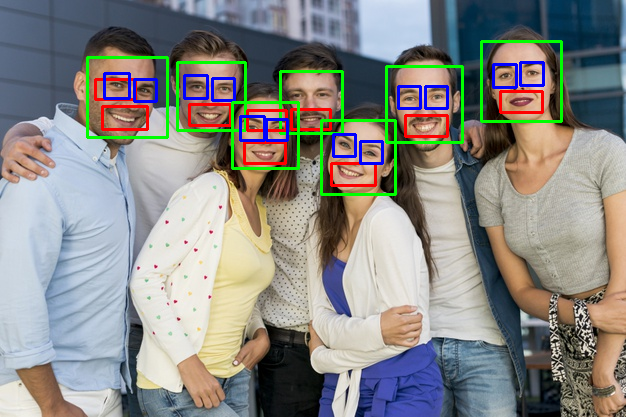

In [0]:
img=cv2.imread("/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/imagenes/foto.jpg")
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces=face_cascade.detectMultiScale(gray,1.3,5);

#print(faces)

# Faces
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  roi_gray=gray[y:y+h,x:x+w]
  roi_color=img[y:y+h,x:x+w]
  #half_gray=gray[y:(int((y+h)/2)),x:x+w]

  # Smiles
  smiles=smile_cascade.detectMultiScale(roi_gray,1.2,5);
  for (x,y,w,h) in smiles:
    cv2.rectangle(roi_color,(x,y),(x+w,y+h),(0,0,255),2)
  
  # Eyes
  eyes=eye_cascade.detectMultiScale(roi_gray,1.03,5);
  for (x,y,w,h) in eyes:
    cv2.rectangle(roi_color,(x,y),(x+w,y+h),(255,0,0),2)

cv2_imshow(img)



##Detectar cuerpos

[[245  60  68 135]
 [488  71  68 135]]


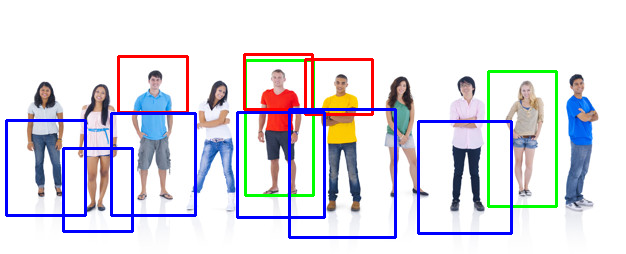

In [0]:
img=cv2.imread("/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/imagenes/personas.jpg")
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bodies=fullbody_cascade.detectMultiScale(gray,1.3,5);
upper=upperbody_cascade.detectMultiScale(gray,1.3,5);
lower=lowerbody_cascade.detectMultiScale(gray,1.3,5);

print(bodies)

for (x,y,w,h) in bodies:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  roi_gray=gray[y:y+h,x:x+w]

for (x,y,w,h) in upper:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
  roi_gray=gray[y:y+h,x:x+w]

for (x,y,w,h) in lower:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gray=gray[y:y+h,x:x+w]

cv2_imshow(img)

## Detección en video

####Test para frame

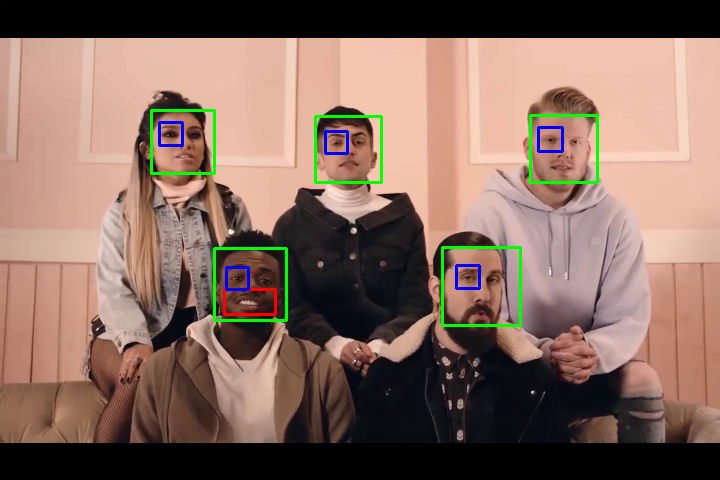

In [0]:
video = cv2.VideoCapture('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/videos/video480.mp4')

video.set(cv2.CAP_PROP_POS_MSEC,3000)
success,img = video.read()

gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces=face_cascade.detectMultiScale(gray,1.3,5);

# Faces
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  roi_gray=gray[y:y+h,x:x+w]
  roi_color=img[y:y+h,x:x+w]

  # Smiles
  smiles=smile_cascade.detectMultiScale(roi_gray,1.3,5);
  for (x,y,w,h) in smiles:
    cv2.rectangle(roi_color,(x,y),(x+w,y+h),(0,0,255),2)
  
  # Eyes
  eyes=eye_cascade.detectMultiScale(roi_gray,1.12,5);
  for (x,y,w,h) in eyes:
    cv2.rectangle(roi_color,(x,y),(x+w,y+h),(255,0,0),2)

cv2_imshow(img)

#### Proceso

In [0]:
#video = cv2.VideoCapture('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/videos/video480.mp4')
video = cv2.VideoCapture('/content/drive/My Drive/UPB_deep_learning_201902/images/familia_cantando.mp4')

#Info necesaria
length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
frames_to = int(length/2)
fps = video.get(cv2.CAP_PROP_FPS)
print(fps)

size = (int(video.get(cv2.CAP_PROP_FRAME_WIDTH)),int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print(size)

#Salida de video
out = cv2.VideoWriter('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/videos/processed_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps-5, size)

print ('Total de frames: '+ str(length),'En proceso...\n', sep='\n')
count = 0

for x in range(frames_to):
  success,frame = video.read()
  img = frame

  # Detección
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces=face_cascade.detectMultiScale(gray,1.3,5);

  # Faces
  for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]

    # Smiles
    smiles=smile_cascade.detectMultiScale(roi_gray,1.3,5);
    for (x,y,w,h) in smiles:
      cv2.rectangle(roi_color,(x,y),(x+w,y+h),(0,0,255),2)
    
    # Eyes
    eyes=eye_cascade.detectMultiScale(roi_gray,1.12,5);
    for (x,y,w,h) in eyes:
      cv2.rectangle(roi_color,(x,y),(x+w,y+h),(255,0,0),2)

  count +=1

  # Escribir en video
  out.write(img)
  
out.release()
print(str(count)+' frames procesados.')




30.0
(640, 360)
Total de frames: 1412
En proceso...

706 frames procesados.
